In [86]:
import numpy as np

seed = 1234
np.random.seed(seed)

In [87]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

telco_customer = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 데이터셋 확인
- 고객의 이탈 여부, 각 고객이 가입한 서비스 정보, 고객 계정 정보, 인구통계학적 정보로 이루어짐
- 총 7043개의 행으로 이루어짐
- 결측치 없음

In [128]:
telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [89]:
telco_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_data = telco_customer[numeric_columns]

In [91]:
time_column = ['Contract']
time_data = telco_customer[time_column]

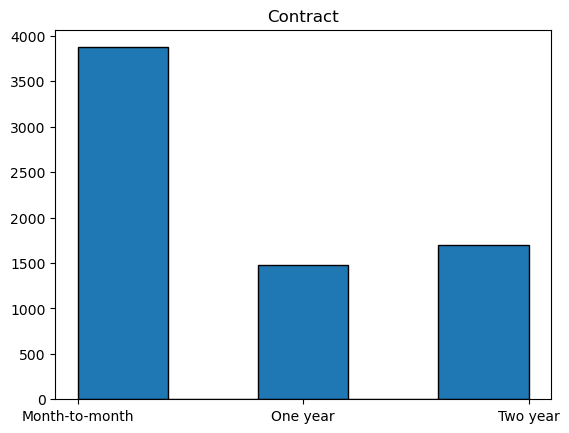

In [92]:
plt.hist(time_data, bins=5, edgecolor='black')
plt.title('Contract')
plt.show()

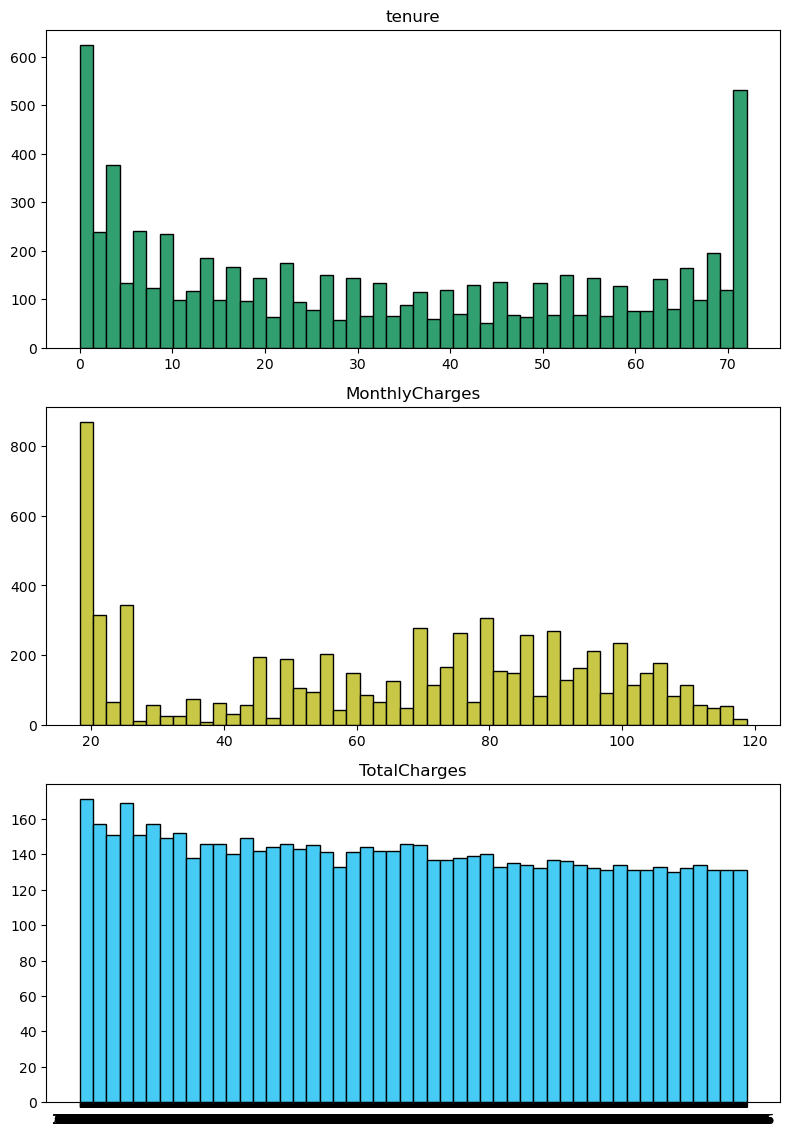

In [93]:
plt.figure(figsize=(8, 15))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(4, 1, idx+1)
    plt.hist(numeric_data[numeric], bins=50, color=col, edgecolor='black')
    plt.title(numeric)
    plt.tight_layout()

plt.tight_layout()
plt.show()

In [94]:
numeric_data['TotalCharges'].replace(' ', np.nan, inplace=True)
clean = numeric_data.dropna()
cleaned_total = clean['TotalCharges'].astype('float')
clean['TotalCharges'] = cleaned_total

/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_92439/2161762763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['TotalCharges'].replace(' ', np.nan, inplace=True)
/var/folders/7v/4grzttpj7vbgfpkyjfh3xndc0000gn/T/ipykernel_92439/2161762763.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean['TotalCharges'] = cleaned_total


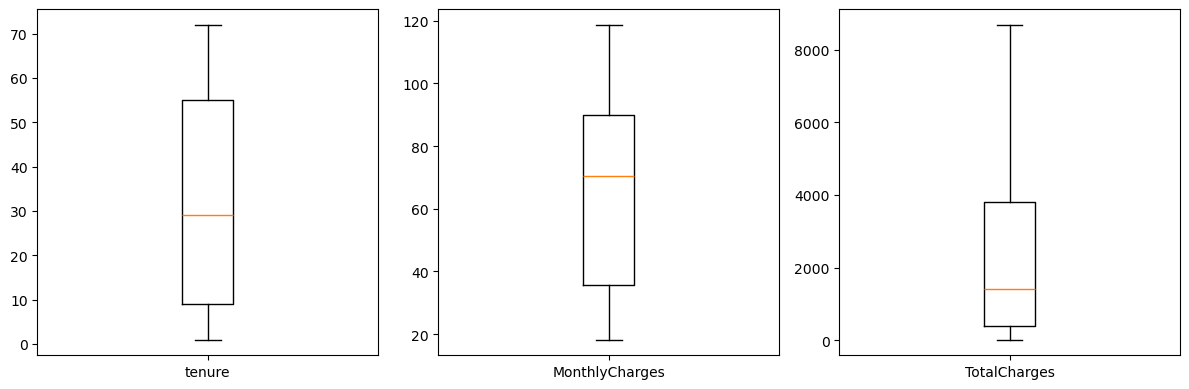

In [95]:
# 아웃라이어 확인
plt.figure(figsize=(12, 4))

np.random.seed(seed)
for idx, numeric in enumerate(clean) :

    plt.subplot(1, 3, idx+1)
    plt.boxplot(clean[numeric].dropna(), labels=[numeric])

plt.tight_layout()
plt.show()

In [96]:
telco_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Raw Data 확인(변수 나누기)
- 수치형 데이터 
    - 이산형 데이터 : ```tenure, MonthlyCharges```
- 범주형 데이터
    - 명목형 데이터 : ```gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, PaperlessBilling, PaymentMethod, Churn```
- 시간형 데이터 : ```Contract``` (시간 정보를 담고 있어서 명목형에서 따로 분리하긴 함)

In [97]:
telco_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
binary_df = telco_customer[['tenure', 'MonthlyCharges']]
category_df = telco_customer[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']]
time_df = telco_customer[['Contract']]
y_column = telco_customer['Churn']

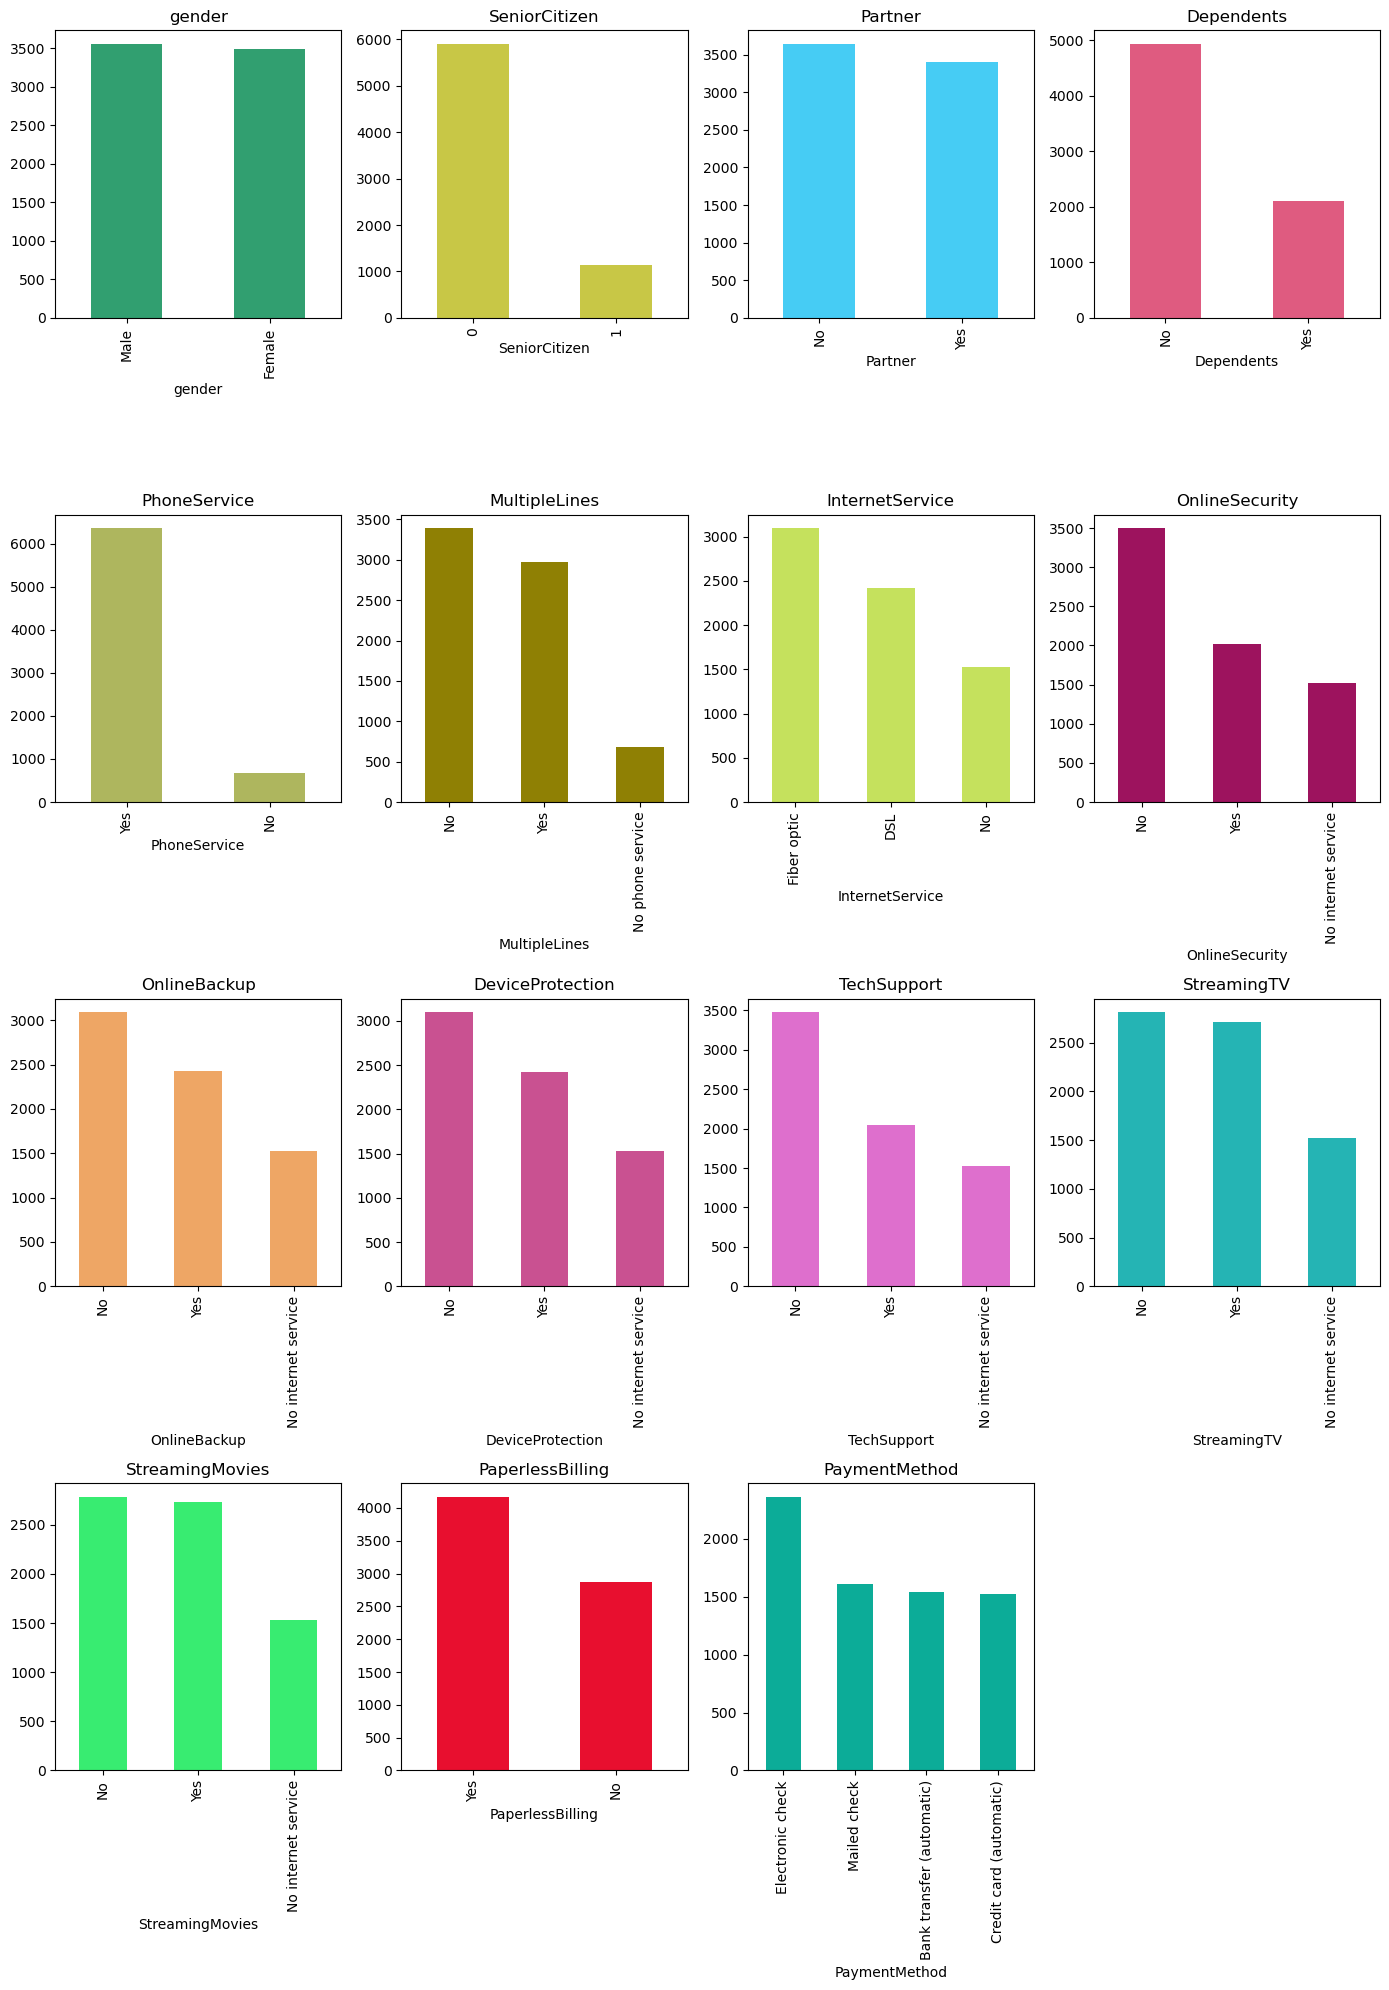

In [99]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 20))
category_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

np.random.seed(seed)
for idx, category in enumerate(category_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(4, 4, idx+1)
    category_df[category].value_counts().plot(kind='bar', color=col)
    plt.title(category)
    plt.tight_layout()

plt.tight_layout()
plt.show()

In [100]:
correlation_matrix = category_df.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(10, 10))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

ValueError: could not convert string to float: 'Female'

### 수치형 데이터 통계분석 - 이산형 데이터

### 기술통계 (Descriptive Statistics)
- 빈도수(frequency)와 비율(proportions) : 계산각 범주가 데이터 세트에서 얼마나 자주 발생하는지 계산합니다. 이는 주로 막대 그래프(bar chart)나 파이 차트(pie chart)로 시각화합니다.
- 모드(Mode): 데이터에서 가장 자주 나타나는 범주입니다. 이산형 데이터의 중심 경향을 나타내는 데 유용합니다.

In [ ]:
# 단순 통계치
binary_df.describe()

In [ ]:
tenure = binary_df['tenure']
tenure.plot(kind='hist')
plt.xlabel('tenure')
plt.ylabel('People')
plt.show()

In [ ]:
frequency = binary_df['tenure'].value_counts()
sorted_frequency = frequency.sort_index()

plt.figure(figsize=(10, 6))
sorted_frequency.plot(kind='bar', color='skyblue')
plt.xlabel('tenure frequency')
plt.ylabel('count')

In [ ]:
mc = binary_df['MonthlyCharges']
mc.plot(kind='hist')
plt.xlabel('monthly Charges')
plt.ylabel('count')
plt.show()

In [ ]:
frequency = binary_df['MonthlyCharges'].value_counts()
sorted_frequency = frequency.sort_index()

plt.figure(figsize=(12, 6))
sorted_frequency.plot(kind='bar', color='skyblue')
plt.xlabel('MonthlyCharges frequency')
plt.ylabel('count')

In [ ]:
# 18~30
sorted_frequency_2 = sorted_frequency.loc[:30]
plt.figure(figsize=(12, 6))
sorted_frequency_2.plot(kind='bar', color='skyblue')
plt.xlabel('MonthlyCharges frequency')
plt.ylabel('count')

### 상관계수 파악 - 이산 vs 범주

In [111]:
y_column.replace(to_replace='Yes', value=1, inplace=True)
y_column.replace(to_replace='No', value=0, inplace=True)

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [108]:
# 크래머V 사용
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

In [ ]:
binary_y = pd.concat([y_column, binary_df], axis=1)

In [ ]:
columns = binary_y.columns
corr = pd.DataFrame(index=columns, columns=columns, dtype=float)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            corr.loc[col1, col2] = cramers_v(binary_y[col1], binary_y[col2])
        else:
            corr.loc[col1, col2] = 1.0

corr

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramér\'s V Correlation Matrix')
plt.show()

### 범주형 데이터 통계분석 - 명목형 데이터

### 범주형 데이터 인코딩
- 1차로 Yes, No 값은 1, 0으로 / 남성 1, 여성 0
- 2차로 triple-class는 Yes 1, No service 0, No  -1
- 3차로 multi_class는 원핫인코딩

### 상관계수 파악 - 이산 vs 범주

In [102]:
multi_class_category_df = category_df[['InternetService', 'PaymentMethod']]
ternary_class_category_df = category_df[['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']]
binary_class_category_df = category_df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']]

In [103]:
# 1차
binary_class_category_df = binary_class_category_df.replace(to_replace='Yes', value=1)
binary_class_category_df = binary_class_category_df.replace(to_replace='No', value=0)
binary_class_category_df = binary_class_category_df.replace(to_replace='Male', value=1)
binary_class_category_df = binary_class_category_df.replace(to_replace='Female', value=0)

In [104]:
# 2차
ternary_class_category_df = ternary_class_category_df.replace(to_replace='Yes', value=1)
ternary_class_category_df = ternary_class_category_df.replace(to_replace='No', value=-1)
ternary_class_category_df = ternary_class_category_df.replace(to_replace='No internet service', value=0)
ternary_class_category_df = ternary_class_category_df.replace(to_replace='No phone service', value=0)

In [105]:
# 3차
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(multi_class_category_df)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out())

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [106]:
# 상관계수 파악
binary_categorical_y = pd.concat([binary_class_category_df], axis=1)
ternary_categorical_y = pd.concat([y_column, ternary_class_category_df], axis=1)
multi_categorical_y = pd.concat([y_column, one_hot_encoded_df], axis=1)

In [112]:
# binary
columns = binary_categorical_y.columns
corr = pd.DataFrame(index=columns, columns=columns, dtype=float)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            corr.loc[col1, col2] = cramers_v(binary_categorical_y[col1], binary_categorical_y[col2])
        else:
            corr.loc[col1, col2] = 1.0

corr

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling
gender,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
SeniorCitizen,0.0,1.000000,0.010817,0.210442,0.000000,0.155693
Partner,0.0,0.010817,1.000000,0.452241,0.012439,0.008414
Dependents,0.0,0.210442,0.452241,1.000000,0.000000,0.110429
PhoneService,0.0,0.000000,0.012439,0.000000,1.000000,0.010702
PaperlessBilling,0.0,0.155693,0.008414,0.110429,0.010702,1.000000


In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramér\'s V Correlation Matrix')
plt.show()

In [109]:
# ternary
columns = ternary_categorical_y.columns
corr = pd.DataFrame(index=columns, columns=columns, dtype=float)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            corr.loc[col1, col2] = cramers_v(ternary_categorical_y[col1], ternary_categorical_y[col2])
        else:
            corr.loc[col1, col2] = 1.0

corr

NameError: name 'chi2_contingency' is not defined

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramér\'s V Correlation Matrix')
plt.show()

In [85]:
# multi
columns = multi_categorical_y.columns
corr = pd.DataFrame(index=columns, columns=columns, dtype=float)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            corr.loc[col1, col2] = cramers_v(multi_categorical_y[col1], multi_categorical_y[col2])
        else:
            corr.loc[col1, col2] = 1.0

corr

NameError: name 'multi_categorical_y' is not defined

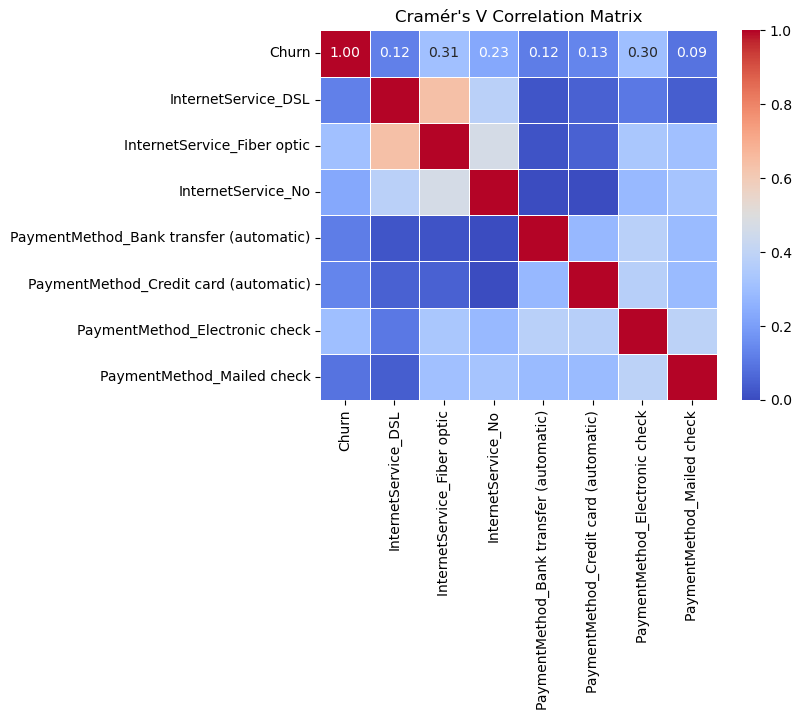

In [260]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramér\'s V Correlation Matrix')
plt.show()

In [117]:
# 상관계수 파악
data = pd.concat([binary_categorical_y, ternary_categorical_y, multi_categorical_y], axis=1)

In [125]:
data = data.drop('Churn', axis=1)

In [126]:
# multi
columns = data.columns
corr = pd.DataFrame(index=columns, columns=columns, dtype=float)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            corr.loc[col1, col2] = cramers_v(data[col1], data[col2])
        else:
            corr.loc[col1, col2] = 1.0

corr

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002416,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010192,0.000000,0.000000,0.006142
SeniorCitizen,0.000000,1.000000,0.010817,0.210442,0.000000,0.155693,0.145682,0.210411,0.182008,0.182307,0.223432,0.184832,0.188222,0.107264,0.254689,0.181897,0.010212,0.020450,0.170907,0.152565
Partner,0.000000,0.010817,1.000000,0.452241,0.012439,0.008414,0.142918,0.151083,0.152419,0.165725,0.126533,0.136314,0.128482,0.000000,0.000000,0.000000,0.109726,0.080816,0.082703,0.094041
Dependents,0.000000,0.210442,0.452241,1.000000,0.000000,0.110429,0.018594,0.193862,0.161897,0.156677,0.181610,0.146124,0.140337,0.050295,0.165088,0.138935,0.050256,0.058697,0.149852,0.057484
PhoneService,0.000000,0.000000,0.012439,0.000000,1.000000,0.010702,0.999929,0.175477,0.172007,0.171504,0.176185,0.179658,0.176731,0.451795,0.289290,0.171224,0.000000,0.000000,0.000000,0.000000
PaperlessBilling,0.000000,0.155693,0.008414,0.110429,0.010702,1.000000,0.165496,0.341408,0.320626,0.321212,0.329116,0.335662,0.331707,0.061681,0.326368,0.320464,0.010652,0.005765,0.208233,0.204722
MultipleLines,0.000000,0.145682,0.142918,0.018594,0.999929,0.165496,1.000000,0.229022,0.244617,0.245800,0.229577,0.261286,0.261852,0.458559,0.414658,0.319387,0.074972,0.063043,0.084600,0.235121
OnlineSecurity,0.002416,0.210411,0.151083,0.193862,0.175477,0.341408,0.229022,1.000000,0.718339,0.717195,0.732982,0.707688,0.708108,0.432582,0.505603,0.999929,0.098788,0.121962,0.359546,0.322156
OnlineBackup,0.000000,0.182008,0.152419,0.161897,0.172007,0.320626,0.244617,0.718339,1.000000,0.719030,0.719739,0.714602,0.713584,0.380534,0.465705,0.999929,0.091749,0.097204,0.307971,0.325749
DeviceProtection,0.000000,0.182307,0.165725,0.156677,0.171504,0.321212,0.245800,0.717195,0.719030,1.000000,0.726393,0.733572,0.735959,0.380291,0.465523,0.999929,0.087437,0.119900,0.309087,0.328554


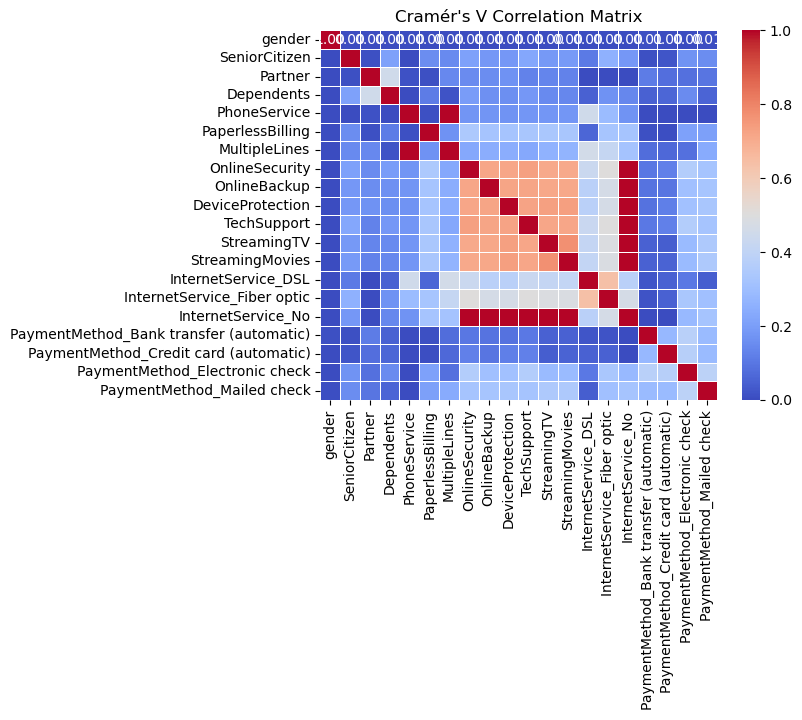

In [127]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramér\'s V Correlation Matrix')
plt.show()

### 상관계수 파악 - 타임(범주) vs 범주

In [273]:
# 계약 기간이 높을수록 높은 등급을 줄 수 있다고 생각
# Two year > One year > Month-to-month의 순서를 등급으로 해서 레이블 인코딩 진행
from sklearn.preprocessing import LabelEncoder

ranks = ['Month-to-month', 'One year', 'Two year']
encoder = LabelEncoder()
time_df_encoded = encoder.fit_transform(time_df) + 1

time_df_encoded_df = pd.DataFrame(time_df_encoded, columns=['Contract'])

/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [275]:
time_df_encoded_df_y = pd.concat([y_column, time_df_encoded_df], axis=1)

In [276]:
# 상관관계
columns = time_df_encoded_df_y.columns
corr = pd.DataFrame(index=columns, columns=columns, dtype=float)

for col1 in columns:
    for col2 in columns:
        if col1 != col2:
            corr.loc[col1, col2] = cramers_v(time_df_encoded_df_y[col1], time_df_encoded_df_y[col2])
        else:
            corr.loc[col1, col2] = 1.0

corr

,Churn,Contract
Churn,1.000000,0.409798
Contract,0.409798,1.000000


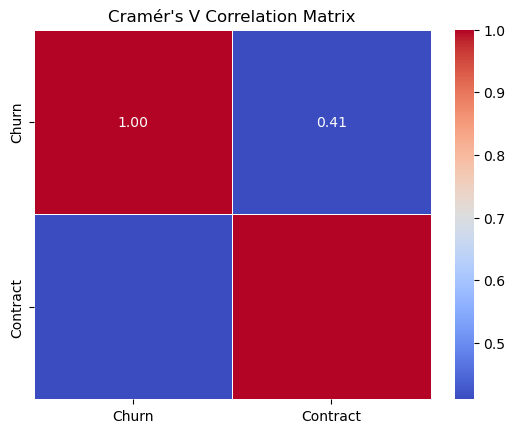

In [277]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Cramér\'s V Correlation Matrix')
plt.show()